Step 1: upload .xlsx dataset

import pandas as pd

df = pd.read_excel('/content/Biomass Gasification Dataset.xlsx')

# Display the first few rows of the DataFrame
print(df.head())

Step 2: checking for missing data

In [ ]:
#check for missing data
missing_data = df.isnull().sum()

#display columns with missing data
missing_data[missing_data > 0]

#dropping rows with missing data
df_cleaned = df.dropna()

#ex of imputing missingvalues with mean
#df['column_name'].fillna(df['column_name'].mean(), inplace=True)

Step 3: check and correct data

In [ ]:
#print datasets columns
print(df.columns)

#check the data types
df.dtypes

#replace 'your_column' with the actual column name that needs conversion
# df['your column'] = df['your column'].str.replace(',','.'.astype(float))

#remove first column of dataset
df = df.iloc[:,1:]

#display the first few rows to confirm the column is removed
df.head()

#check dataset again to ensure everyhting is correct
#print datasets column
print(df.columns)

#check the data types to identify numeric columns
df.dtypes

Index(['TP', 'TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C', 'H', 'N', 'O',
       'Qm (mg/g)'],
      dtype='object')
Index(['TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C', 'H', 'N', 'O',
       'Qm (mg/g)'],
      dtype='object')


,0
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64
N,object
O,float64
Qm (mg/g),object


Step 4: categorical variable identification

In [ ]:
#identify catergorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#display categorical columns
categorical_columns

Index(['N', 'Qm (mg/g)'], dtype='object')

Step 5: one hot encoding for categorical variables

In [ ]:
#apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df,columns=categorical_columns,drop_first=True)

#display the first few rows of the encoded dataset
df_encoded.head()

,TemP,Time (min),PS,BET,PV,C,H,O,N_0.17,N_0.3,...,Qm (mg/g)_122.844,Qm (mg/g)_147.9,Qm (mg/g)_157.69,Qm (mg/g)_160.3,Qm (mg/g)_167.5,Qm (mg/g)_187.313,Qm (mg/g)_205,Qm (mg/g)_231.14,Qm (mg/g)_1.39,Qm (mg/g)_238.10
0,315,150.0,9.82,3.43,0.02,30.84,2.14,20.32,False,False,...,False,False,False,False,False,False,False,False,False,False
1,600,10.0,1.37,94.39,0.06,30.69,0.96,20.41,False,False,...,False,False,False,False,False,False,False,False,False,False
2,800,10.0,1.37,120.86,0.08,28.81,0.47,19.29,False,False,...,False,False,False,False,False,False,False,False,False,False
3,800,150.0,1.41,209.12,0.13,27.05,0.82,9.73,False,False,...,False,False,False,False,False,False,False,False,False,False
4,800,10.0,3.69,10.82,0.02,35.35,0.72,2.01,False,False,...,False,False,False,False,False,False,False,False,False,False


Step 6: splitting the data into X (features) and y (Target)

In [ ]:
#assuming 'target_column' is the same of your target variable
X = df_encoded.drop('TemP',axis=1)
y = df_encoded['TemP']

#display first few rows of x and y
X.head(),y.head()

(   Time (min)    PS     BET    PV      C     H      O  N_0.17  N_0.3  N_0.31  \
 0       150.0  9.82    3.43  0.02  30.84  2.14  20.32   False  False   False   
 1        10.0  1.37   94.39  0.06  30.69  0.96  20.41   False  False   False   
 2        10.0  1.37  120.86  0.08  28.81  0.47  19.29   False  False   False   
 3       150.0  1.41  209.12  0.13  27.05  0.82   9.73   False  False   False   
 4        10.0  3.69   10.82  0.02  35.35  0.72   2.01   False  False   False   
 
    ...  Qm (mg/g)_122.844  Qm (mg/g)_147.9  Qm (mg/g)_157.69  Qm (mg/g)_160.3  \
 0  ...              False            False             False            False   
 1  ...              False            False             False            False   
 2  ...              False            False             False            False   
 3  ...              False            False             False            False   
 4  ...              False            False             False            False   
 
    Qm (mg/g)_167.

Step 7: additional data preprocessing techniques

             TemP  Time (min)          PS          BET         PV          C  \
count   86.000000   86.000000   85.000000    86.000000  85.000000  83.000000   
mean   566.453488  151.347287   13.908847   191.444442   0.152331  57.293855   
std    170.921148  126.607738   38.958862   298.769825   0.180884  20.399065   
min    300.000000    0.100000    1.320000     0.479000   0.001000   9.460000   
25%    450.000000   60.000000    2.880000     7.100000   0.020000  41.490000   
50%    500.000000  120.000000    4.440000    59.090000   0.100000  60.000000   
75%    700.000000  150.000000    9.850000   295.500000   0.230000  74.195000   
max    950.000000  480.000000  213.290000  1838.860000   1.030000  89.570000   

               H          O  
count  82.000000  83.000000  
mean    1.927890  16.469048  
std     1.648728  11.025043  
min     0.000000   0.670000  
25%     0.834000  10.100000  
50%     1.630000  14.030000  
75%     2.622500  21.755000  
max    10.300000  55.010000  
One-hot e

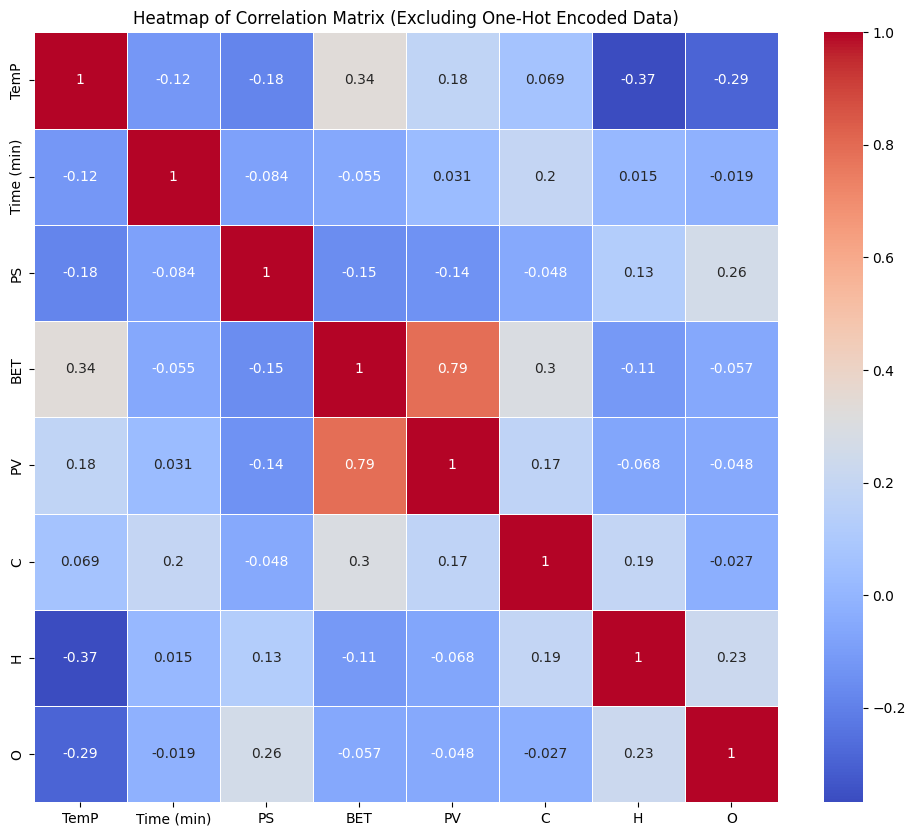

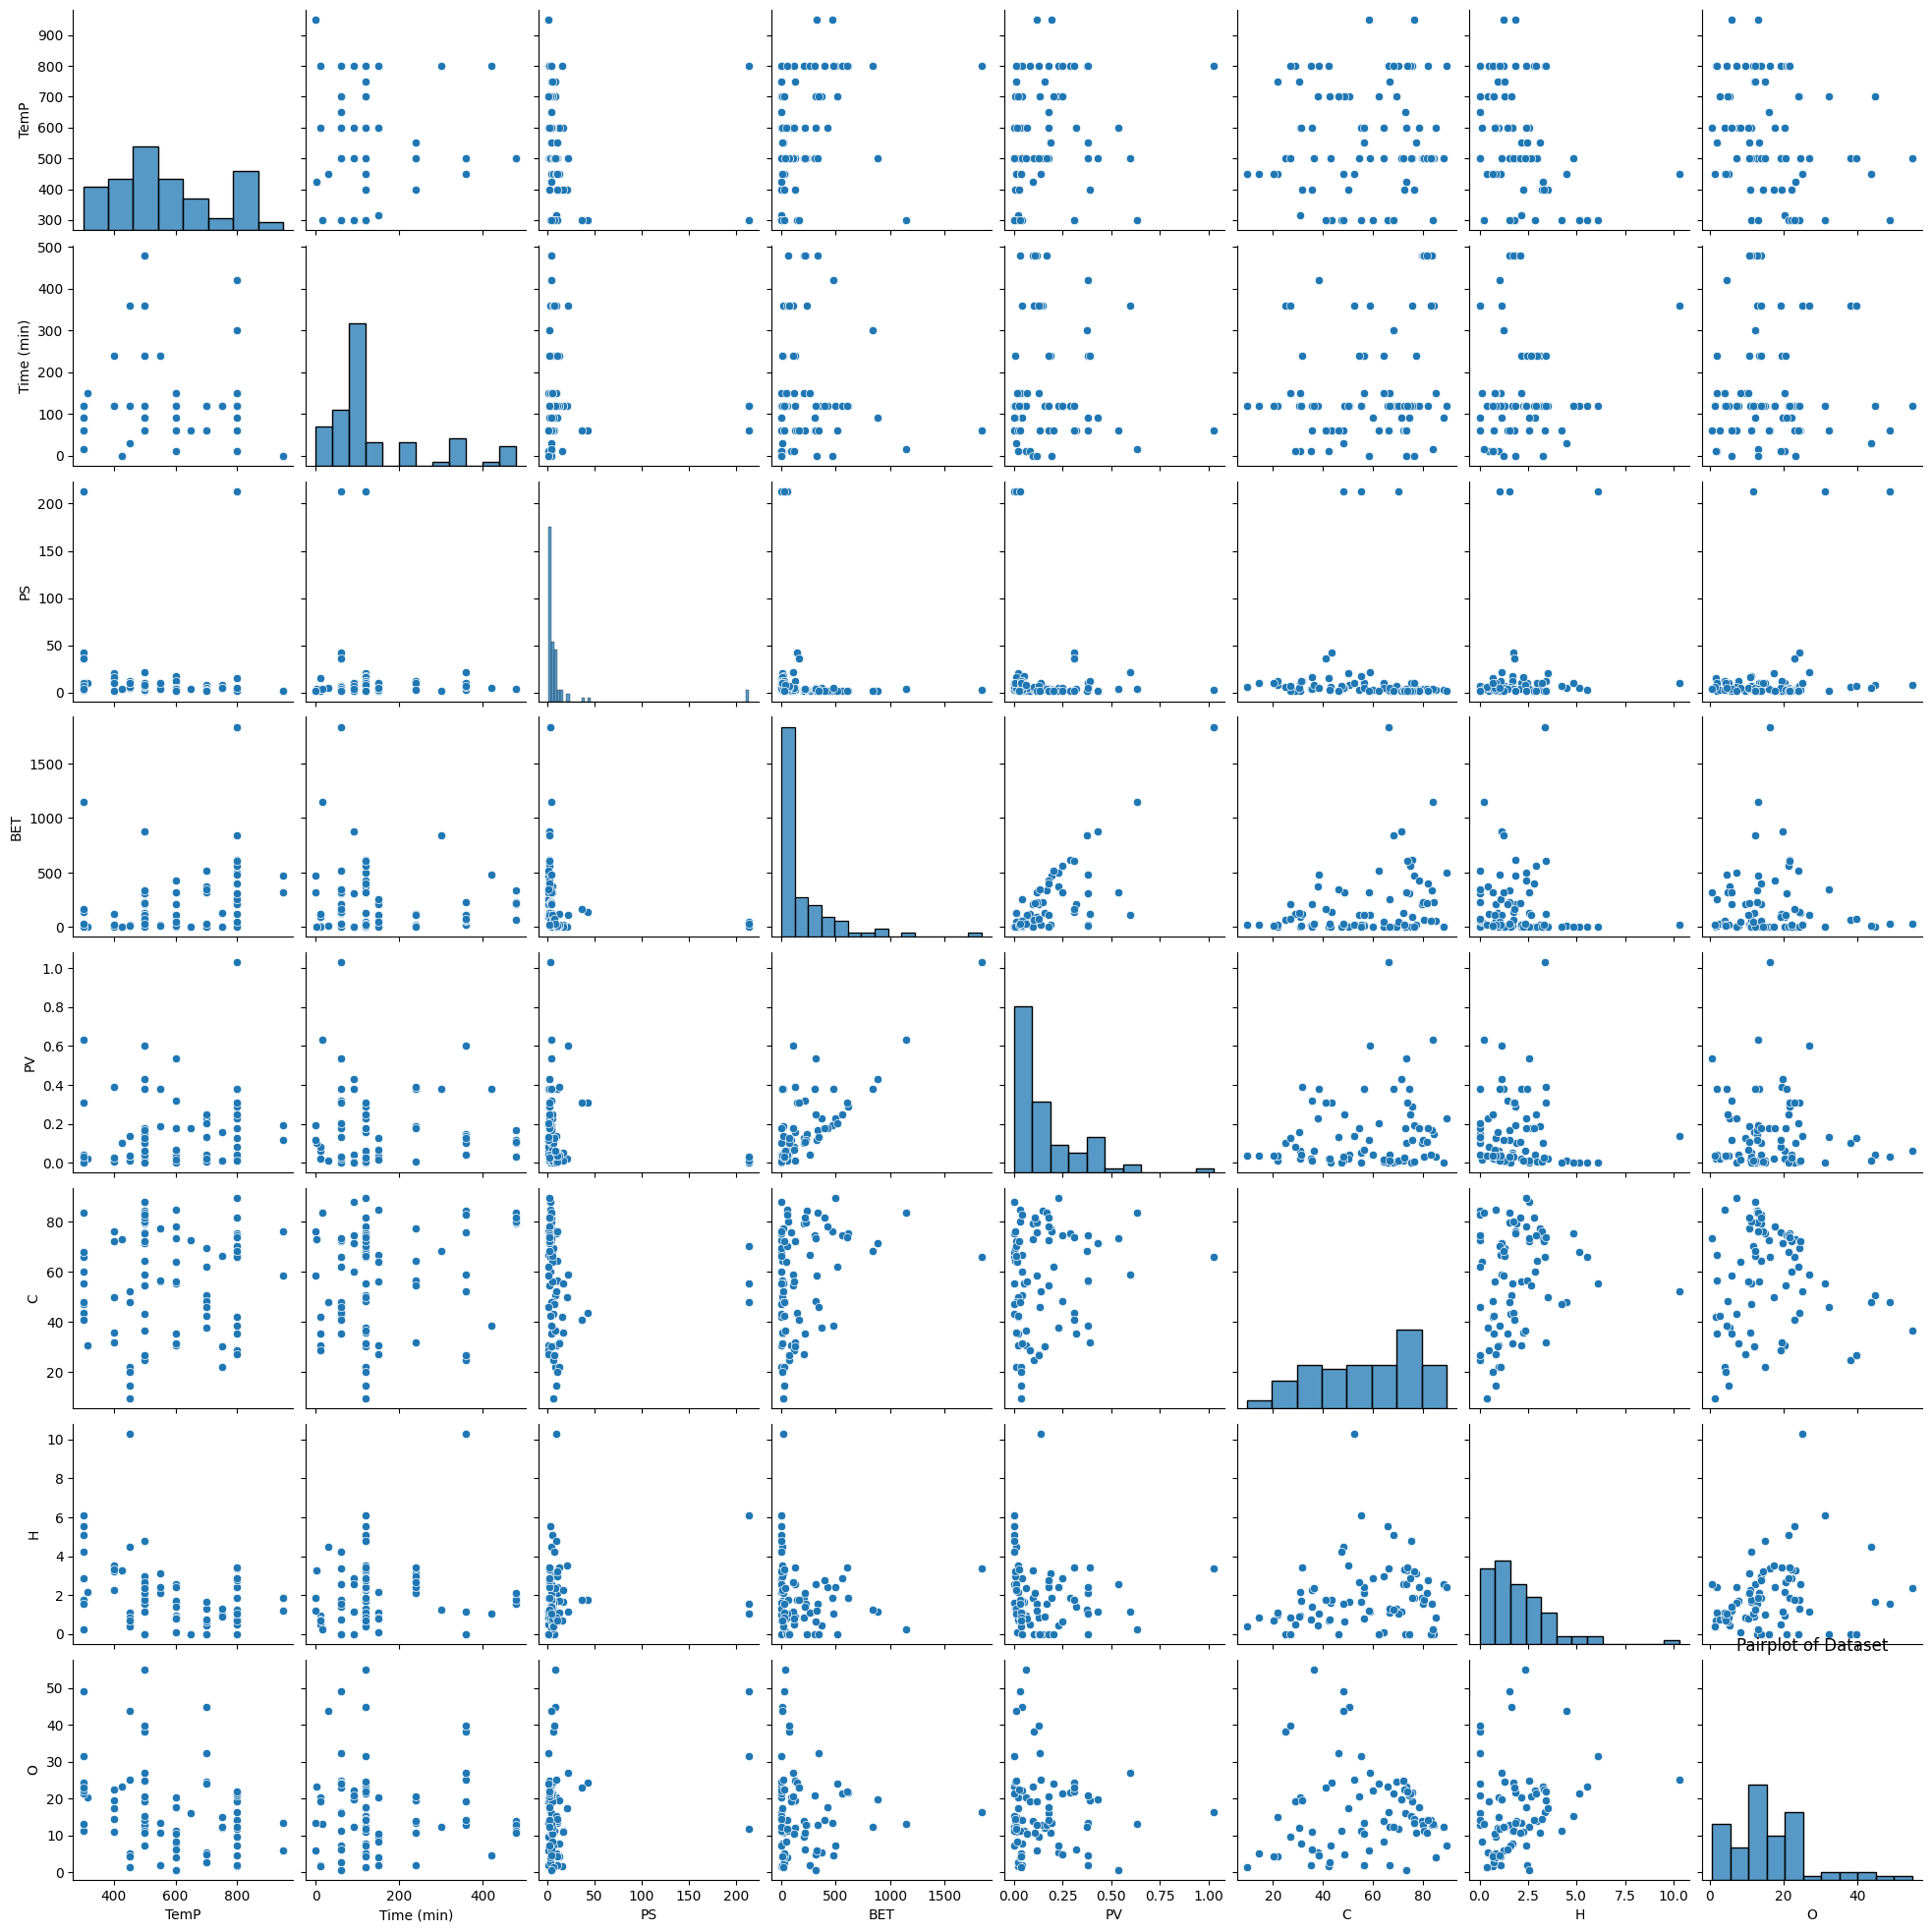

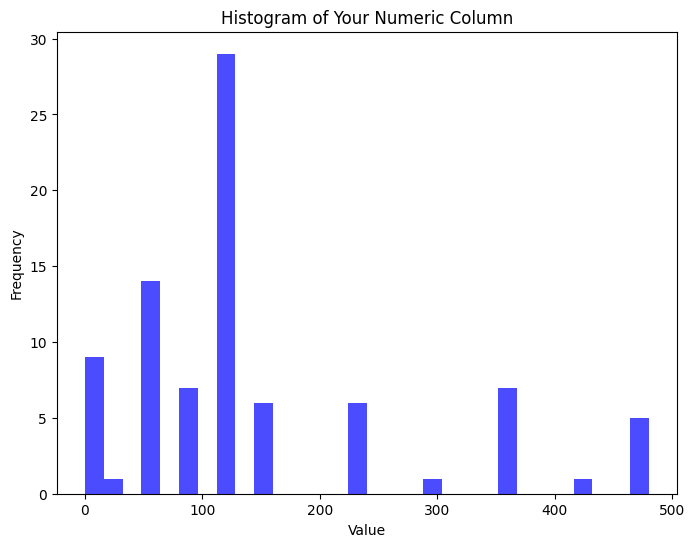

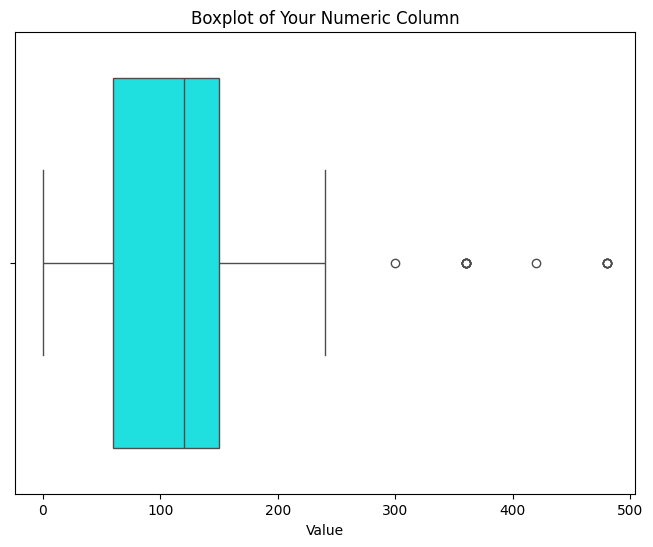

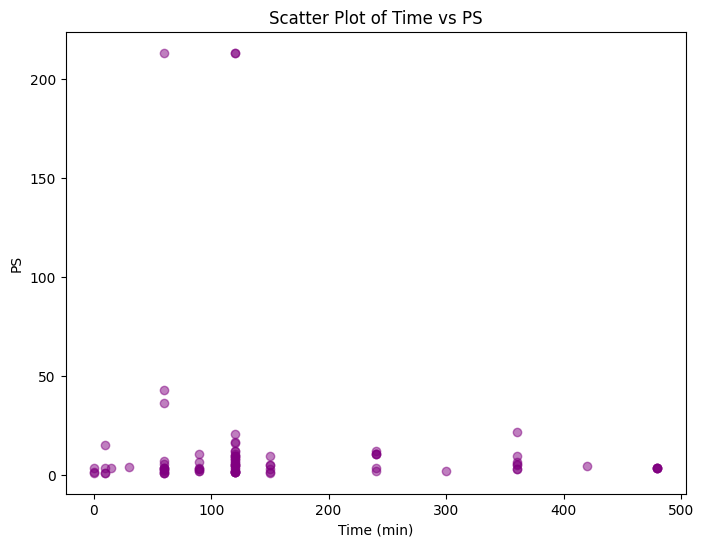

<ipython-input-25-21d9a87b79db>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TemP',y='Time (min)', data=df, palette='muted')


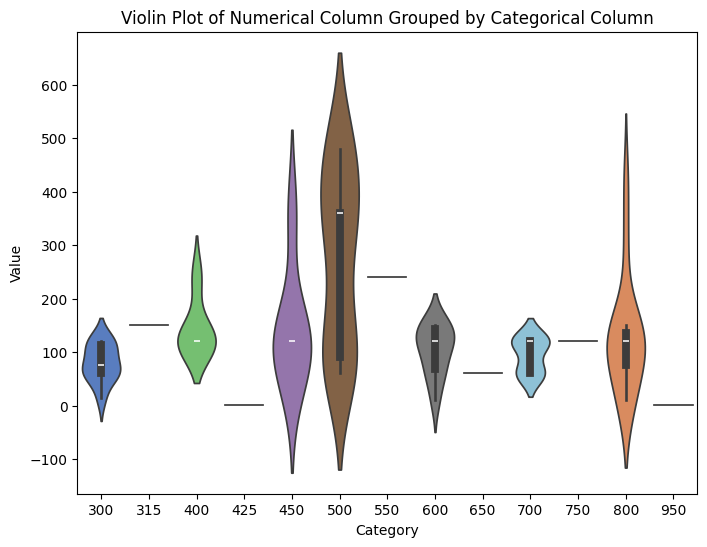

In [ ]:
#display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

#assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

#print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

#exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

import seaborn as sns
import matplotlib.pyplot as plt

#plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12,10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()

#plot a pairplot to visualize relationships between variables
sns.pairplot(df)
plt.title('Pairplot of Dataset')
plt.show()

import matplotlib.pyplot as plt
#plotting histogram for specific numeric column
plt.figure(figsize=(8,6))
plt.hist(df['Time (min)'], bins=30,alpha=0.7,color='blue')
plt.title('Histogram of Your Numeric Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

import seaborn as sns
#plotting boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Time (min)'],color='cyan')
plt.title('Boxplot of Your Numeric Column')
plt.xlabel('Value')
plt.show()

#plotting a scatter plot for 2 numeric columns
plt.figure(figsize=(8,6))
plt.scatter(df['Time (min)'], df['PS'],alpha=0.5,color='purple')
plt.title('Scatter Plot of Time vs PS')
plt.xlabel('Time (min)')
plt.ylabel('PS')
plt.show()

#violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='TemP',y='Time (min)', data=df, palette='muted')
plt.title('Violin Plot of Numerical Column Grouped by Categorical Column')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()